In [1]:
import pandas as pd

df = pd.read_csv("data/lightcast_job_postings.csv")

print(df.head())
print(df.info())

                                         ID LAST_UPDATED_DATE  \
0  1f57d95acf4dc67ed2819eb12f049f6a5c11782c          9/6/2024   
1  0cb072af26757b6c4ea9464472a50a443af681ac          8/2/2024   
2  85318b12b3331fa490d32ad014379df01855c557          9/6/2024   
3  1b5c3941e54a1889ef4f8ae55b401a550708a310          9/6/2024   
4  cb5ca25f02bdf25c13edfede7931508bfd9e858f         6/19/2024   

      LAST_UPDATED_TIMESTAMP  DUPLICATES    POSTED    EXPIRED  DURATION  \
0  2024-09-06 20:32:57.352 Z         0.0  6/2/2024   6/8/2024       6.0   
1  2024-08-02 17:08:58.838 Z         0.0  6/2/2024   8/1/2024       NaN   
2  2024-09-06 20:32:57.352 Z         1.0  6/2/2024   7/7/2024      35.0   
3  2024-09-06 20:32:57.352 Z         1.0  6/2/2024  7/20/2024      48.0   
4  2024-06-19 07:00:00.000 Z         0.0  6/2/2024  6/17/2024      15.0   

             SOURCE_TYPES                                        SOURCES  \
0       [\n  "Company"\n]                        [\n  "brassring.com"\n]   
1     

C:\Users\15PRO\AppData\Local\Temp\ipykernel_15088\3175921105.py:3: DtypeWarning: Columns (19,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/lightcast_job_postings.csv")


In [2]:
columns_to_drop = [
    "ID", "URL", "ACTIVE_URLS", "DUPLICATES", "LAST_UPDATED_TIMESTAMP",
    "NAICS2", "NAICS3", "NAICS4", "NAICS5", "NAICS6",
    "SOC_2", "SOC_3", "SOC_5"
]

df.drop(columns=columns_to_drop, inplace=True)

print("Updated DataFrame columns:", df.columns.tolist())

Updated DataFrame columns: ['LAST_UPDATED_DATE', 'POSTED', 'EXPIRED', 'DURATION', 'SOURCE_TYPES', 'SOURCES', 'ACTIVE_SOURCES_INFO', 'TITLE_RAW', 'BODY', 'MODELED_EXPIRED', 'MODELED_DURATION', 'COMPANY', 'COMPANY_NAME', 'COMPANY_RAW', 'COMPANY_IS_STAFFING', 'EDUCATION_LEVELS', 'EDUCATION_LEVELS_NAME', 'MIN_EDULEVELS', 'MIN_EDULEVELS_NAME', 'MAX_EDULEVELS', 'MAX_EDULEVELS_NAME', 'EMPLOYMENT_TYPE', 'EMPLOYMENT_TYPE_NAME', 'MIN_YEARS_EXPERIENCE', 'MAX_YEARS_EXPERIENCE', 'IS_INTERNSHIP', 'SALARY', 'REMOTE_TYPE', 'REMOTE_TYPE_NAME', 'ORIGINAL_PAY_PERIOD', 'SALARY_TO', 'SALARY_FROM', 'LOCATION', 'CITY', 'CITY_NAME', 'COUNTY', 'COUNTY_NAME', 'MSA', 'MSA_NAME', 'STATE', 'STATE_NAME', 'COUNTY_OUTGOING', 'COUNTY_NAME_OUTGOING', 'COUNTY_INCOMING', 'COUNTY_NAME_INCOMING', 'MSA_OUTGOING', 'MSA_NAME_OUTGOING', 'MSA_INCOMING', 'MSA_NAME_INCOMING', 'NAICS2_NAME', 'NAICS3_NAME', 'NAICS4_NAME', 'NAICS5_NAME', 'NAICS6_NAME', 'TITLE', 'TITLE_NAME', 'TITLE_CLEAN', 'SKILLS', 'SKILLS_NAME', 'SPECIALIZED_SKILL

In [3]:
missing_ratios = df.isnull().mean()
ranked_missing = missing_ratios.sort_values(ascending=False)

print(ranked_missing)

high_missing = missing_ratios[missing_ratios > 0.5]

print(high_missing)

ACTIVE_SOURCES_INFO     0.892163
MAX_YEARS_EXPERIENCE    0.883721
MAX_EDULEVELS           0.774959
MAX_EDULEVELS_NAME      0.774959
LIGHTCAST_SECTORS       0.754655
                          ...   
NAICS_2022_6_NAME       0.000607
SOURCES                 0.000303
SOURCE_TYPES            0.000303
LAST_UPDATED_DATE       0.000303
POSTED                  0.000303
Length: 118, dtype: float64
ACTIVE_SOURCES_INFO       0.892163
MAX_EDULEVELS             0.774959
MAX_EDULEVELS_NAME        0.774959
MAX_YEARS_EXPERIENCE      0.883721
SALARY                    0.575050
ORIGINAL_PAY_PERIOD       0.553119
SALARY_TO                 0.553119
SALARY_FROM               0.553119
LIGHTCAST_SECTORS         0.754655
LIGHTCAST_SECTORS_NAME    0.754655
dtype: float64


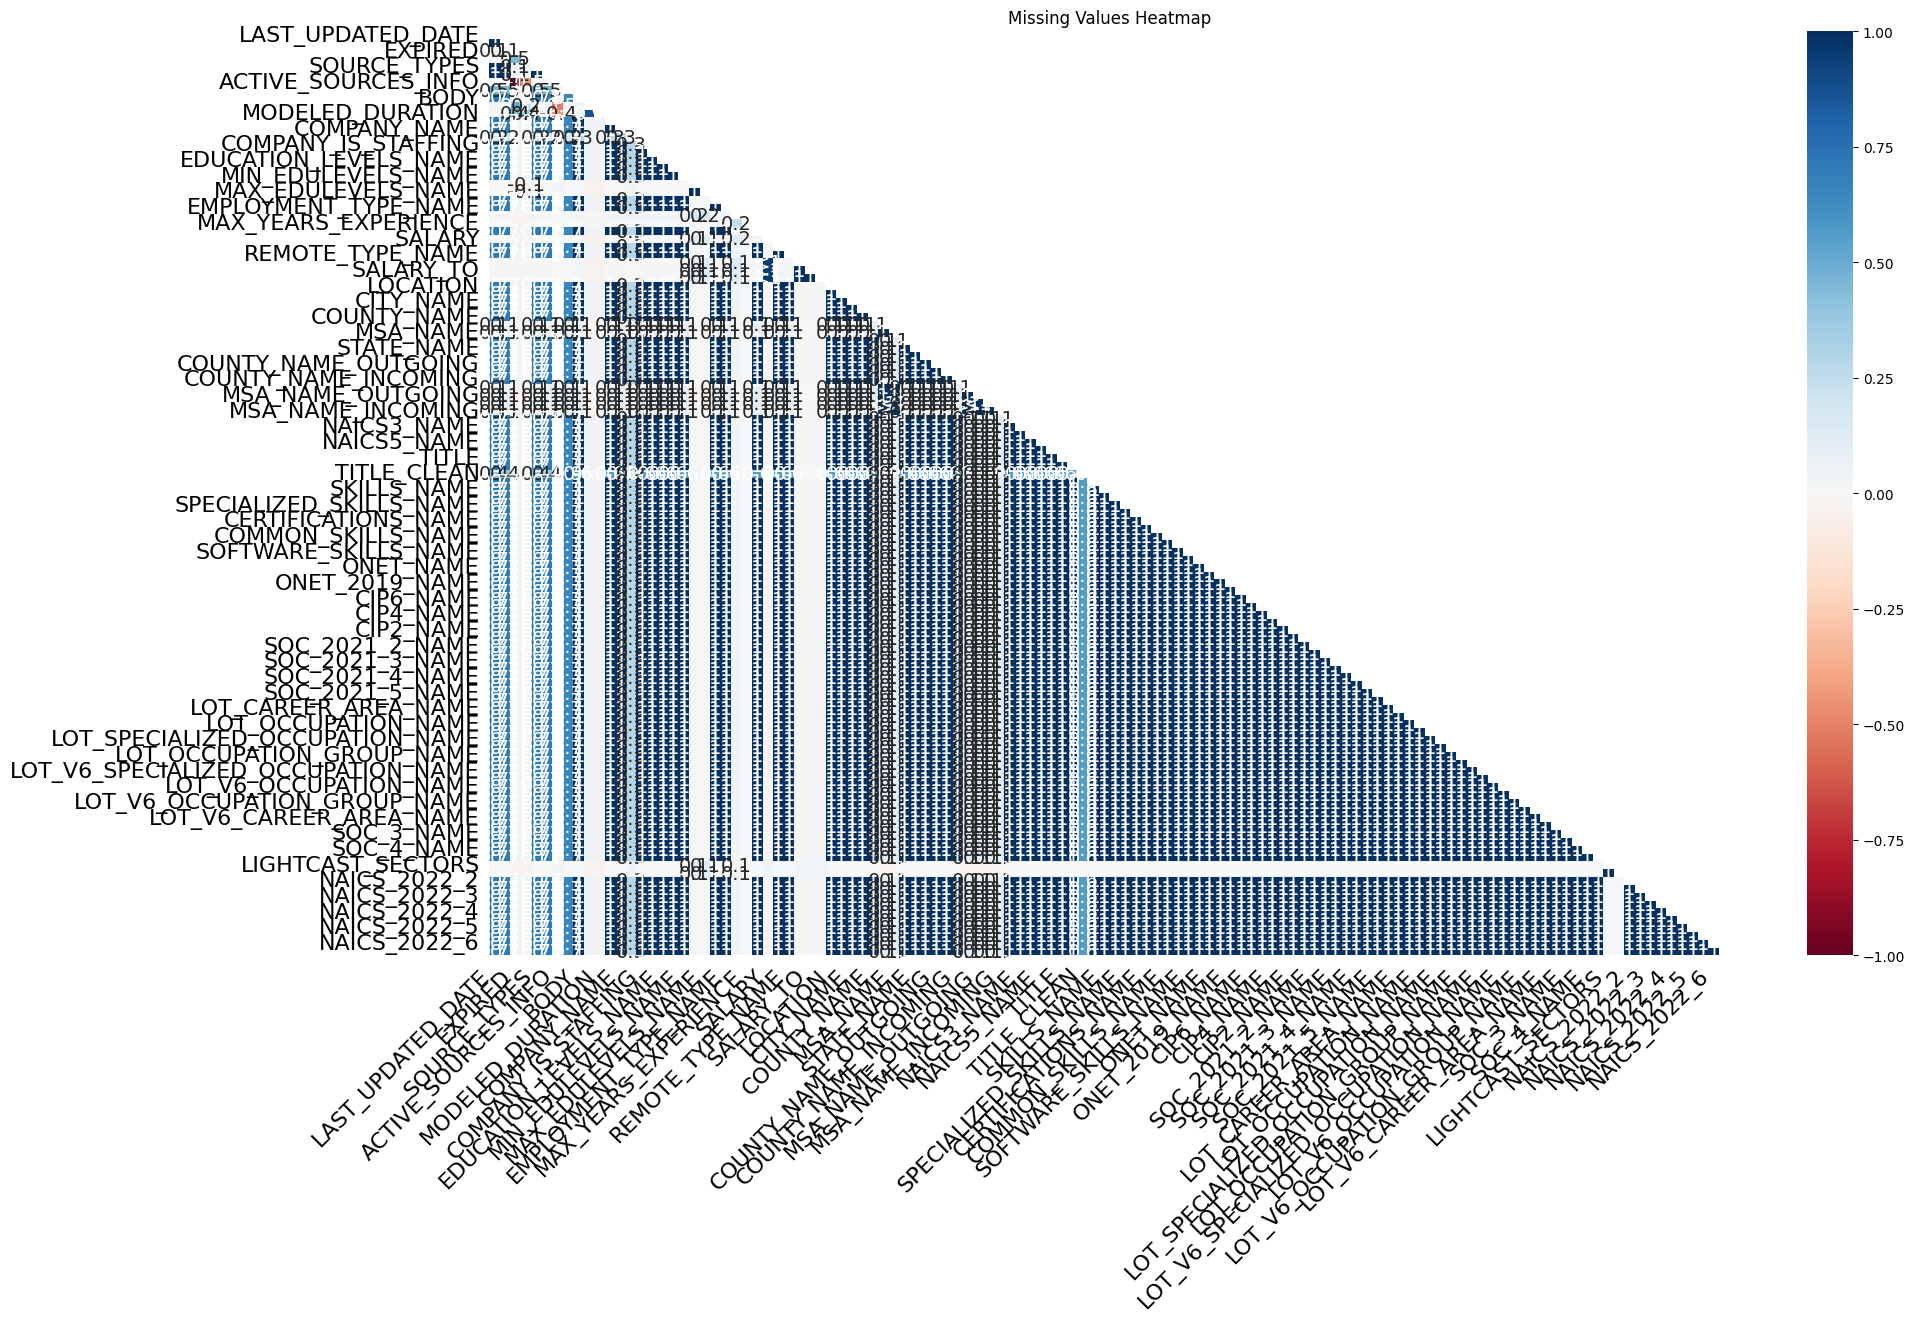

C:\Users\15PRO\AppData\Local\Temp\ipykernel_15088\1425958293.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["SALARY"].fillna(df["SALARY"].median(), inplace=True)


In [4]:
import missingno as msno
import matplotlib.pyplot as plt
# Visualize missing data
msno.heatmap(df)
plt.title("Missing Values Heatmap")
plt.show()
df["SALARY"].fillna(df["SALARY"].median(), inplace=True)

# Drop columns with >50% missing values
df.dropna(thresh=len(df) * 0.5, axis=1, inplace=True)


In [5]:
df.fillna(df.mean(numeric_only=True), inplace=True)
df.fillna("Unknown", inplace=True)

In [6]:
# Remove duplicates based on key columns
df = df.drop_duplicates(
    subset=["TITLE", "COMPANY", "LOCATION", "POSTED"],
    keep="first"
)

In [7]:
df.to_csv("data/clean_lightcast_job_postings.csv",index=None)